In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from qiskit import BasicAer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
import math

[ 0.745-0.001j  0.04 -0.078j  0.042-0.053j -0.019-0.025j -0.026+0.173j
  0.022-0.028j  0.059-0.128j  0.03 -0.059j  0.479+0.227j  0.04 -0.159j
 -0.055-0.115j -0.039-0.068j -0.013+0.11j   0.056-0.057j -0.041+0.002j
  0.016-0.158j]


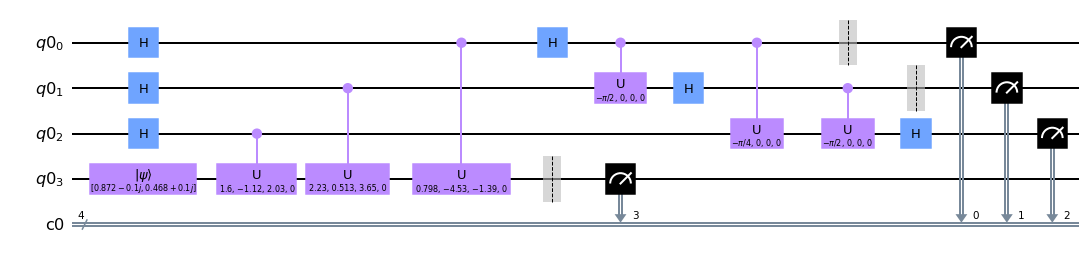

In [2]:
q=QuantumRegister(4)
c=ClassicalRegister(4)
qc=QuantumCircuit(q,c)

#initial state of the fourth qubit (eigenstate)
phase0=complex(math.cos(-0.1144),math.sin(-0.1144))
phase1=complex(math.cos(0.3252-0.1144),math.sin(0.3252-0.1144))
state_vector=[math.cos(0.4996)*phase0,math.sin(0.4996)*phase1]
qc.initialize(state_vector,[q[3]])
#preparation of the three first qubits (3-bit eigenvalue estimation)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

#Controlled U_rho
qc.cu(1.59899,-1.11512,2.02647,0,q[2],q[3])

#Controlled U_rho^2
qc.cu(2.22862,0.513123,3.65472,0,q[1],q[3])

#Controlled U_rho^4
qc.cu(0.797922,-4.53103,-1.38944,0,q[0],q[3])

#Inverse QFT
qc.h(q[0])
qc.cu(-1/2*np.pi,0,0,0,q[0],q[1])
qc.h(q[1])
qc.cu(-1/4*np.pi,0,0,0,q[0],q[2])
qc.cu(-1/2*np.pi,0,0,0,q[1],q[2])
qc.h(q[2])

#Run on Statevector smulator
backend_state=BasicAer.get_backend('statevector_simulator')
job_state=execute(qc,backend_state)
result_state=job_state.result()
outputstate=result_state.get_statevector(qc,decimals=3)
print(outputstate)

#projection and meassurement
qc.barrier(q[0])
qc.barrier(q[1])
qc.barrier(q[3])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])
qc.draw(output='mpl')

In [5]:
#Run on qasm simulator
backend_qasm=BasicAer.get_backend('qasm_simulator')
job_qasm=execute(qc,backend_qasm,shots=8192)
result_qasm=job_qasm.result()
counts=result_qasm.get_counts(qc)
print(counts)
plot_histogram(counts)
sim_jobID=job_qasm.job_id()
print('SIMULATION JOB ID: {}'.format(sim_jobID)) 

{'0000': 4579, '1000': 2236, '0100': 259, '1111': 215, '0110': 174, '0111': 39, '1010': 125, '1001': 233, '1110': 19, '0010': 48, '1100': 101, '1101': 47, '0101': 10, '0001': 59, '1011': 43, '0011': 5}
SIMULATION JOB ID: c1e7a830-01bb-470e-abd7-5525b6ce59fc


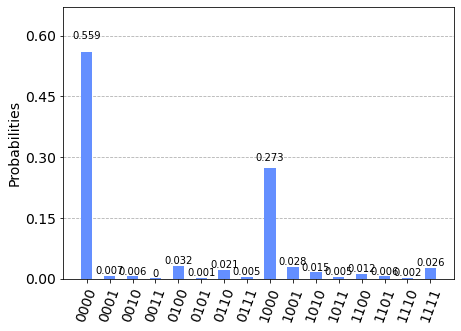

In [6]:
plot_histogram(counts)

In [ ]:
#Run on real device
backend_exp=IBMQ.get_backend('ibmqx2')
backend_exp.name()
job_exp=execute(qc,backend_exp,shots=8192)#,max_credits=3)
job_monitor(job_exp)
result_exp=job_exp.result()
counts_exp = result_exp.get_counts()
print(counts_exp)
plot_histogram([counts_exp,counts])
jobID=job_exp.job_id()
print('JOB ID: {}'.format(jobID))